# Spam prediction using Class Vectorizer and TF-IDF as means for Natural Language Processing (NLP), and Naive-Bayes Machine Learning Classifier Method.

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**The data is downloaded from UCI (University of Calivornia, Irvine) Machine Learning Repository. The data is some YouTube viewers' comments in 2017 of a music video from South Korean pop artist, Psy. The comments can be classified as spam and not spam. Text of the spam comments most likely are not related to the video. Spam comments are mostly the way of users to lead viewers to visit the link of their website.**

**Link for the dataset: https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection**

### Exploratory Data Analysis

In [71]:
psy = pd.read_csv('Youtube01-Psy.csv')

In [33]:
psy.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


**CLASS shows the classification of the comment (['CONTENT']).**

**Class 1 = spam.**

**Class 0 = not spam.**

In [18]:
psy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
COMMENT_ID    350 non-null object
AUTHOR        350 non-null object
DATE          350 non-null object
CONTENT       350 non-null object
CLASS         350 non-null int64
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [19]:
psy.describe()

,CLASS
count,350.000000
mean,0.500000
std,0.500716
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


**To check whether the timestamp is related to the comment classification or not, first the DATE column has to be converted to datetime format.**

In [72]:
psy['DATE'] = pd.to_datetime(psy['DATE'], format='%Y-%m-%dT%H:%M:%S')

In [73]:
psy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
COMMENT_ID    350 non-null object
AUTHOR        350 non-null object
DATE          350 non-null datetime64[ns]
CONTENT       350 non-null object
CLASS         350 non-null int64
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 13.8+ KB


In [74]:
psy['TIME'] = psy['DATE'].apply(lambda x: x.hour)

In [76]:
psy.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,TIME
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07 06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,6
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07 12:37:15,Hey guys check out my new channel and our firs...,1,12
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08 17:34:21,just for test I have to say murdev.com,1,17
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09 08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,8
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10 16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,16


**Classifiy the time as AM or PM.**

In [77]:
def time(x):
    if x > 11:
        return 'PM'
    else:
        return 'AM'

In [78]:
psy['TIME'] = psy['TIME'].apply(time)

In [79]:
psy.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,TIME
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07 06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,AM
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07 12:37:15,Hey guys check out my new channel and our firs...,1,PM
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08 17:34:21,just for test I have to say murdev.com,1,PM
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09 08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,AM
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10 16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,PM


**It is better to classifiy the comment as 'spam' or 'not spam' rather than 1 or 0.**

In [80]:
def spamornot(label):
    if label == 1:
        return 'spam'
    else:
        return 'not spam'

In [81]:
psy['LABEL'] = psy['CLASS'].apply(spamornot)

In [82]:
psy.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,TIME,LABEL
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07 06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,AM,spam
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07 12:37:15,Hey guys check out my new channel and our firs...,1,PM,spam
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08 17:34:21,just for test I have to say murdev.com,1,PM,spam
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09 08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,AM,spam
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10 16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,PM,spam


In [97]:
plt.rcParams['patch.force_edgecolor']=True
plt.rcParams['axes.grid']=True
plt.rcParams['grid.alpha']=0.4

**There is no time trend for each spam and not spam comments. And this dataset contains balanced labels.**

spam        175
not spam    175
Name: LABEL, dtype: int64

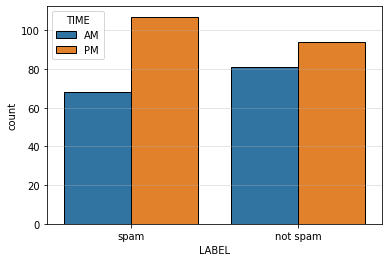

In [107]:
sns.countplot(x='LABEL', data=psy, hue='TIME')
psy['LABEL'].value_counts()

**However comments posted on PM time are more than comments posted on AM time.**

PM    201
AM    149
Name: TIME, dtype: int64

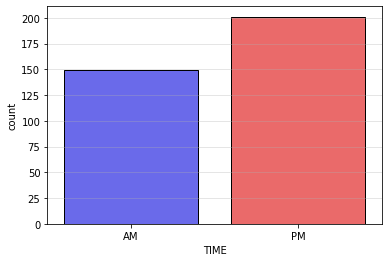

In [108]:
sns.countplot(x='TIME', data=psy, palette='seismic')
psy['TIME'].value_counts()

### Building machine learning model.

**import string to remove the punctuation in the comments. And the stopwords that is imported from nltk.corpus is to remove common words (i.e. our you, you're, how, all, etc.), so later the TF-IDF can get better result of the document's weigh.**

**The text_process function will be used later in the pipeline method.**

In [109]:
import string
from nltk.corpus import stopwords

def text_process(comment):
    nopunc = [char for char in comment if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

**Some example of common english words in stopwords.words corpus.**

In [135]:
stopwords.words('english')[99:109]

['once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both']

**Using K Fold method for data split. n_split is set to 4, as there are 350 rows. Common way to determine the n_split is:**


**n_split = 350 / (350*0.3), as 0.3 represents the approximation of test size.**

In [110]:
X = psy['CONTENT']
y = psy['CLASS']

In [111]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=4, shuffle=True, random_state=101)
kf.get_n_splits(X)

4

In [112]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

**Using pipeline method to create a package of methods that needed for building the model (except the data split which has been done above).**

In [113]:
from sklearn.pipeline import Pipeline

**'bow' represents the CountVectorizer method, and it takes text_process function as the analyzer argument. It removes the punctuation, and common words from the document (comment). And then the CountVectorizer transforms the document from string to a vector.**

**'tfidf' represents the TF-IDF method. It determines the weigh of the document, based off of the document vector.**

**'classifier' represents the Naive-Bayes(NB) machine learning method. The NB type used here is the MultinomialNB.**

In [114]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

pipe = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

**The fit method will apply three of the methods above on the training dataset.**

In [115]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000178B1E3E318>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

**Create predictions object as the prediction based off of the test dataset.**

In [116]:
predictions = pipe.predict(X_test)

In [117]:
from sklearn.metrics import confusion_matrix, classification_report

**The metrics below shows that the model performs quite well on the test data. As it only predicts falsely on 10 data. And the f1-score weighted average reaches .88 which is quite high (near 1) thus represents a good model.**

In [118]:
print(confusion_matrix(y_test, predictions))
print()
print(classification_report(y_test, predictions))

[[36  9]
 [ 1 41]]

              precision    recall  f1-score   support

           0       0.97      0.80      0.88        45
           1       0.82      0.98      0.89        42

    accuracy                           0.89        87
   macro avg       0.90      0.89      0.88        87
weighted avg       0.90      0.89      0.88        87



### Create a dataframe to prove that the model can be used to later predict new data.

**In this case, the new data will be represented as the data from row 330 to 340. It is not the same situation, because the prediction will be based on the model that is created from the said dataset. The newly created model's purpose is to be used on the new data.**

In [119]:
test_pred = pipe.predict(np.ravel(psy['CONTENT'][330:341]))

In [120]:
test_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [121]:
testpred_result = psy[330:341]
testpred_result

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,TIME,LABEL
330,z12oex5p1miewvugp04cgjfqiq3xsxrolhk,Caius Ballad,2014-11-13 00:58:20,imagine if this guy put adsense on with all th...,0,AM,not spam
331,z13supiartrcdr4la22xc3aripu2x1z3a,Ink Video Shorts,2014-11-13 02:33:53,Hey come check us out were new on youtube let ...,1,AM,spam
332,z12uthyi5vratjy0v22ycxxhgpuqs5te2,Sigaraya Nesora,2014-11-13 06:33:21,"The girl in the train who was dancing, her out...",0,AM,not spam
333,z131idupvn3yhf3mv23dwzhi4pqixvwuw,Александр Федоров,2014-11-13 07:59:33,"Look at the pictures, if not difficult http://...",1,AM,spam
334,z12gcx5hzkayhbmve23ghd3plt2czf2rp04,ArioseRose,2014-11-13 15:20:31,"Don't mind me, I'm just checking what the view...",0,PM,not spam
335,z13qhxcb2ybzszosx22rh5hwhmmccpjx404,The Silent Troll Defuser HD,2014-11-13 15:47:27,Hey guys can you check my YouTube channel I kn...,1,PM,spam
336,z12yivpznrezu3gyf04ce11xdvmquxzjdo00k,Tom Hosford,2014-11-13 17:42:06,To everyone joking about how he hacked to get ...,0,PM,not spam
337,z13uud25otb0ird2h230chu54neyehsbg04,Tofik Miedzyń,2014-11-13 21:48:26,https://www.facebook.com/tofikmiedzynB/photos/...,1,PM,spam
338,z12ozx4w5mytupefv23vvxdroqehuvbvv,MrValentinique,2014-11-13 22:33:31,https://www.facebook.com/eeccon/posts/73394924...,1,PM,spam
339,z12vvnza4rq5tvzou04cgxeookraexq5opo0k,Ghazi Rizvi,2014-11-13 23:02:09,http://www.bing.com/explore/rewards?PUBL=REFER...,1,PM,spam


In [122]:
testpred_result = testpred_result.reset_index()
testpred_result

,index,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,TIME,LABEL
0,330,z12oex5p1miewvugp04cgjfqiq3xsxrolhk,Caius Ballad,2014-11-13 00:58:20,imagine if this guy put adsense on with all th...,0,AM,not spam
1,331,z13supiartrcdr4la22xc3aripu2x1z3a,Ink Video Shorts,2014-11-13 02:33:53,Hey come check us out were new on youtube let ...,1,AM,spam
2,332,z12uthyi5vratjy0v22ycxxhgpuqs5te2,Sigaraya Nesora,2014-11-13 06:33:21,"The girl in the train who was dancing, her out...",0,AM,not spam
3,333,z131idupvn3yhf3mv23dwzhi4pqixvwuw,Александр Федоров,2014-11-13 07:59:33,"Look at the pictures, if not difficult http://...",1,AM,spam
4,334,z12gcx5hzkayhbmve23ghd3plt2czf2rp04,ArioseRose,2014-11-13 15:20:31,"Don't mind me, I'm just checking what the view...",0,PM,not spam
5,335,z13qhxcb2ybzszosx22rh5hwhmmccpjx404,The Silent Troll Defuser HD,2014-11-13 15:47:27,Hey guys can you check my YouTube channel I kn...,1,PM,spam
6,336,z12yivpznrezu3gyf04ce11xdvmquxzjdo00k,Tom Hosford,2014-11-13 17:42:06,To everyone joking about how he hacked to get ...,0,PM,not spam
7,337,z13uud25otb0ird2h230chu54neyehsbg04,Tofik Miedzyń,2014-11-13 21:48:26,https://www.facebook.com/tofikmiedzynB/photos/...,1,PM,spam
8,338,z12ozx4w5mytupefv23vvxdroqehuvbvv,MrValentinique,2014-11-13 22:33:31,https://www.facebook.com/eeccon/posts/73394924...,1,PM,spam
9,339,z12vvnza4rq5tvzou04cgxeookraexq5opo0k,Ghazi Rizvi,2014-11-13 23:02:09,http://www.bing.com/explore/rewards?PUBL=REFER...,1,PM,spam


In [123]:
testpred_result['PREDICTIONS'] = test_pred

In [124]:
testpred_result.set_index('index', inplace=True)

In [125]:
testpred_result

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,TIME,LABEL,PREDICTIONS
index,,,,,,,,
330,z12oex5p1miewvugp04cgjfqiq3xsxrolhk,Caius Ballad,2014-11-13 00:58:20,imagine if this guy put adsense on with all th...,0,AM,not spam,0
331,z13supiartrcdr4la22xc3aripu2x1z3a,Ink Video Shorts,2014-11-13 02:33:53,Hey come check us out were new on youtube let ...,1,AM,spam,1
332,z12uthyi5vratjy0v22ycxxhgpuqs5te2,Sigaraya Nesora,2014-11-13 06:33:21,"The girl in the train who was dancing, her out...",0,AM,not spam,0
333,z131idupvn3yhf3mv23dwzhi4pqixvwuw,Александр Федоров,2014-11-13 07:59:33,"Look at the pictures, if not difficult http://...",1,AM,spam,1
334,z12gcx5hzkayhbmve23ghd3plt2czf2rp04,ArioseRose,2014-11-13 15:20:31,"Don't mind me, I'm just checking what the view...",0,PM,not spam,0
335,z13qhxcb2ybzszosx22rh5hwhmmccpjx404,The Silent Troll Defuser HD,2014-11-13 15:47:27,Hey guys can you check my YouTube channel I kn...,1,PM,spam,1
336,z12yivpznrezu3gyf04ce11xdvmquxzjdo00k,Tom Hosford,2014-11-13 17:42:06,To everyone joking about how he hacked to get ...,0,PM,not spam,0
337,z13uud25otb0ird2h230chu54neyehsbg04,Tofik Miedzyń,2014-11-13 21:48:26,https://www.facebook.com/tofikmiedzynB/photos/...,1,PM,spam,1
338,z12ozx4w5mytupefv23vvxdroqehuvbvv,MrValentinique,2014-11-13 22:33:31,https://www.facebook.com/eeccon/posts/73394924...,1,PM,spam,1


In [126]:
def result(thelabel):
    if thelabel == 0:
        return 'not spam'
    else:
        return 'spam'

In [127]:
testpred_result['PREDICTIONS_LABEL'] = testpred_result['PREDICTIONS'].apply(result)

In [128]:
testpred_result

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,TIME,LABEL,PREDICTIONS,PREDICTIONS_LABEL
index,,,,,,,,,
330,z12oex5p1miewvugp04cgjfqiq3xsxrolhk,Caius Ballad,2014-11-13 00:58:20,imagine if this guy put adsense on with all th...,0,AM,not spam,0,not spam
331,z13supiartrcdr4la22xc3aripu2x1z3a,Ink Video Shorts,2014-11-13 02:33:53,Hey come check us out were new on youtube let ...,1,AM,spam,1,spam
332,z12uthyi5vratjy0v22ycxxhgpuqs5te2,Sigaraya Nesora,2014-11-13 06:33:21,"The girl in the train who was dancing, her out...",0,AM,not spam,0,not spam
333,z131idupvn3yhf3mv23dwzhi4pqixvwuw,Александр Федоров,2014-11-13 07:59:33,"Look at the pictures, if not difficult http://...",1,AM,spam,1,spam
334,z12gcx5hzkayhbmve23ghd3plt2czf2rp04,ArioseRose,2014-11-13 15:20:31,"Don't mind me, I'm just checking what the view...",0,PM,not spam,0,not spam
335,z13qhxcb2ybzszosx22rh5hwhmmccpjx404,The Silent Troll Defuser HD,2014-11-13 15:47:27,Hey guys can you check my YouTube channel I kn...,1,PM,spam,1,spam
336,z12yivpznrezu3gyf04ce11xdvmquxzjdo00k,Tom Hosford,2014-11-13 17:42:06,To everyone joking about how he hacked to get ...,0,PM,not spam,0,not spam
337,z13uud25otb0ird2h230chu54neyehsbg04,Tofik Miedzyń,2014-11-13 21:48:26,https://www.facebook.com/tofikmiedzynB/photos/...,1,PM,spam,1,spam
338,z12ozx4w5mytupefv23vvxdroqehuvbvv,MrValentinique,2014-11-13 22:33:31,https://www.facebook.com/eeccon/posts/73394924...,1,PM,spam,1,spam


**As the conclusion, the data normalization, vectorization, and TF-IDF method used on this notebook work well to get a good model to be used later to predict new comment classification.**

(end of notebook).